# Info

- ORCHID
- imported from south archipelago
- if sunlight exxposure is less than 7 hours per day production decreases with 4% for every ten minutes
- ideal humidity is between 60% and 80%; production falls for 2% for every 5% point for humidity change

- storage: 0.1 seashell per orchid per timestep

# Tasks:
- calculate avg trade volume and order book volume -> doesnt seem to be liquid enough to market make
- look at executed trades for amethyst and starfruit, also create more features and use MSE to evaluate regressions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:

prices_path__1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_-1.csv'
prices_path_1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_1.csv'
prices_path_0 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_0.csv'
df__1 = pd.read_csv(prices_path__1, sep=";")
df_0 = pd.read_csv(prices_path_0, sep=";")
df_1 = pd.read_csv(prices_path_1, sep=";")

merged = pd.concat([df__1,df_0,df_1], axis=0)
merged = merged.fillna(0) 
merged = merged.drop(['DAY','timestamp'], axis=1)
merged.index = np.arange(1,30004)
print(merged.shape)
print(merged.keys())
print(merged.describe())
print(merged.corr())

(30003, 6)
Index(['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF',
       'SUNLIGHT', 'HUMIDITY'],
      dtype='object')
            ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
count  30003.000000    30003.000000   30003.000000   30003.000000   
mean    1103.617855        1.237043       9.728044      -3.405143   
std       81.975222        0.287521       1.368582       1.235526   
min      960.750000        0.700000       7.500000      -6.500000   
25%     1039.250000        1.000000       8.500000      -4.500000   
50%     1081.750000        1.300000       9.500000      -2.600000   
75%     1195.750000        1.400000      10.500000      -2.400000   
max     1257.250000        2.100000      19.500000      -2.000000   

           SUNLIGHT      HUMIDITY  
count  30003.000000  30003.000000  
mean    2777.073279     79.073562  
std      912.366591      9.366057  
min     1397.304900     59.999580  
25%     1973.018900     71.204712  
50%     2498.066200     78.

Text(0.5, 1.0, 'import_tariff')

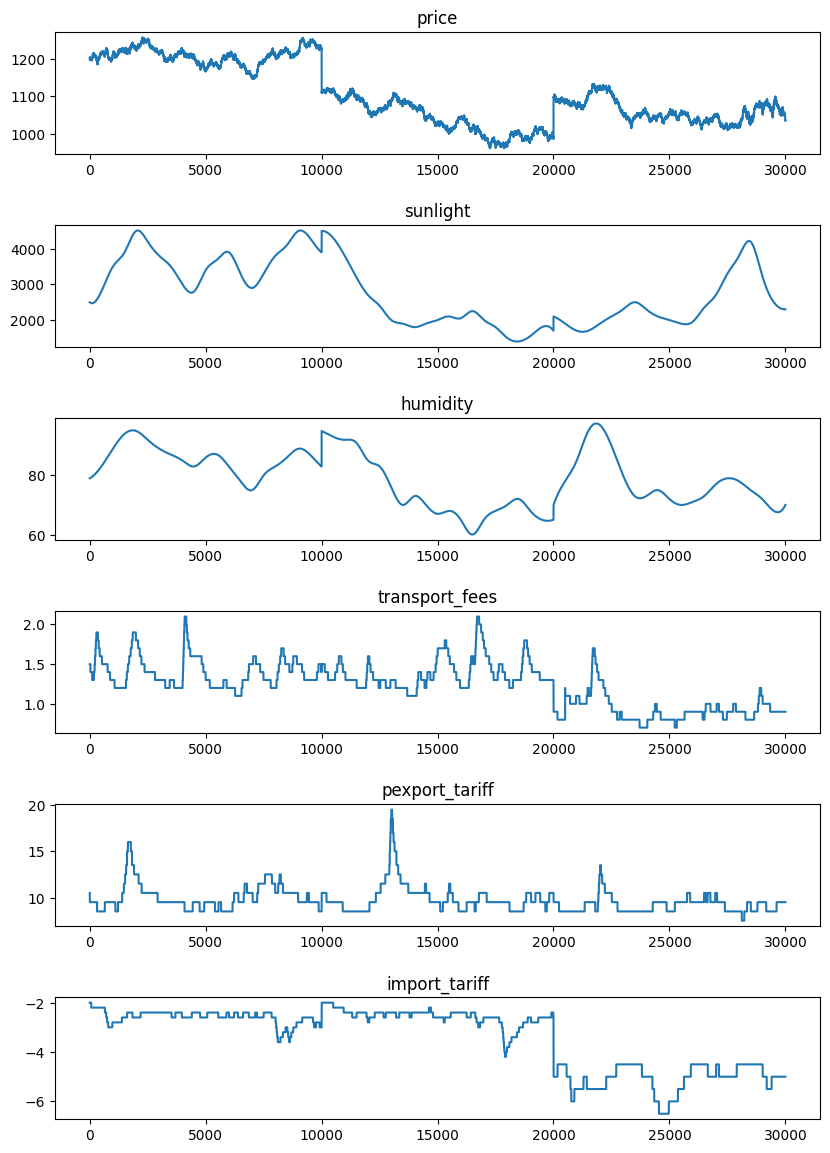

In [58]:
fig, ax = plt.subplots(6,figsize=(9, 12))
fig.tight_layout(pad=3.0)
ax[0].plot(merged['ORCHIDS'])
ax[0].set_title('price')
ax[1].plot(merged['SUNLIGHT'])
ax[1].set_title('sunlight')
ax[2].plot(merged['HUMIDITY'])
ax[2].set_title('humidity')
ax[3].plot(merged['TRANSPORT_FEES'])
ax[3].set_title('transport_fees')
ax[4].plot(merged['EXPORT_TARIFF'])
ax[4].set_title('pexport_tariff')
ax[5].plot(merged['IMPORT_TARIFF'])
ax[5].set_title('import_tariff')

In [152]:
df_am.keys()

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'spread',
       'total_bid_voltume', 'total_ask_volume', 'imbalance'],
      dtype='object')

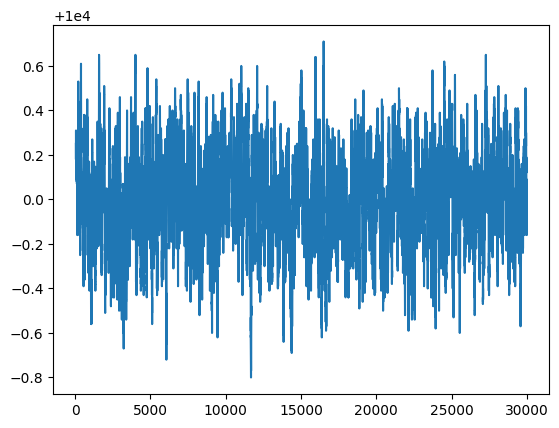

In [141]:
plt.plot(df_am['mid_price'].rolling(50).mean())

# STARFRUIT

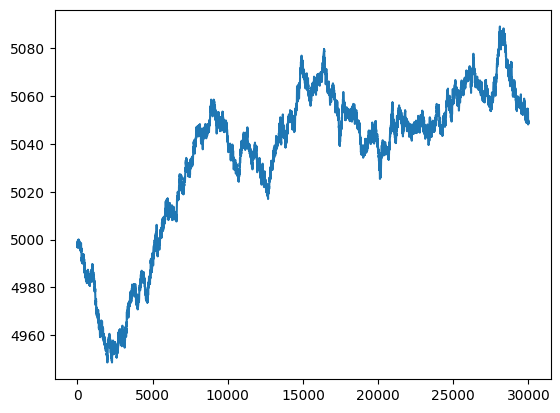

In [156]:
plt.plot(df_star['bid_price_1'].rolling(5).mean())

In [153]:
X = []
Y = []
trend = np.array(df_star['bid_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [154]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.729e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:47:43   Log-Likelihood:                -40433.
No. Observations:               20000   AIC:                         8.088e+04
Df Residuals:                   19995   BIC:                         8.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2342      1.909      1.694      0.0

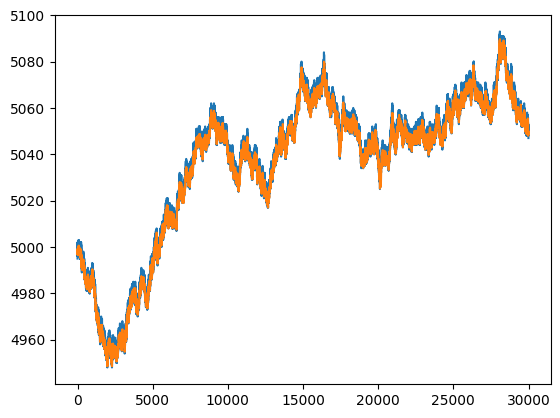

In [155]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)

In [157]:
X = []
Y = []
trend = np.array(df_star['ask_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [158]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:49:44   Log-Likelihood:                -39434.
No. Observations:               20000   AIC:                         7.888e+04
Df Residuals:                   19995   BIC:                         7.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9417      1.815      1.621      0.1

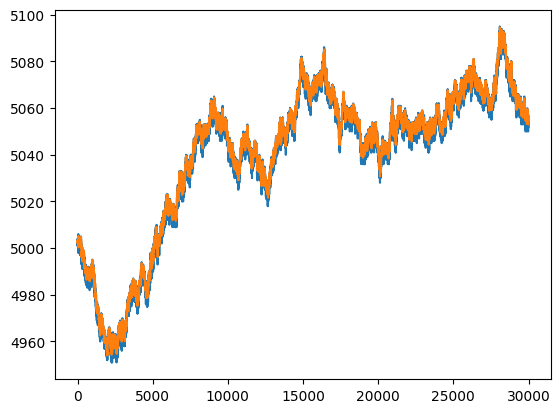

In [159]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)